# Gender Classification Modelling

### Import Modules

In [1]:
import os
import imghdr
import numpy as np
from matplotlib import pyplot as plt

# installed modules
import cv2
import tensorflow as tf

#### Run this if you have GPU on your system

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth if there is GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

### Declare constants

In [23]:
data_dir = 'datasets' 
image_extension = ['jpeg','jpg', 'bmp', 'png']
classes = {
    0: 'Female',
    1: 'Male'
}

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            tip = imghdr.what(image_path)
            if tip not in image_extension: 
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as err: 
            print({'error': err,
                  'message': f'Issue with image {image_path}'})
            # os.remove(image_path)

### Load Data

In [61]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 11649 files belonging to 2 classes.


In [42]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

### Image Visualization

In [47]:
def visualize_batch_image(batch):
    fig, ax = plt.subplots(ncols=4, figsize=(20,20))
    for idx, img in enumerate(batch[0][:4]):
        ax[idx].imshow(img.astype(int))
        ax[idx].title.set_text(classes[batch[1][idx]])
    return 

#### Original Dimension

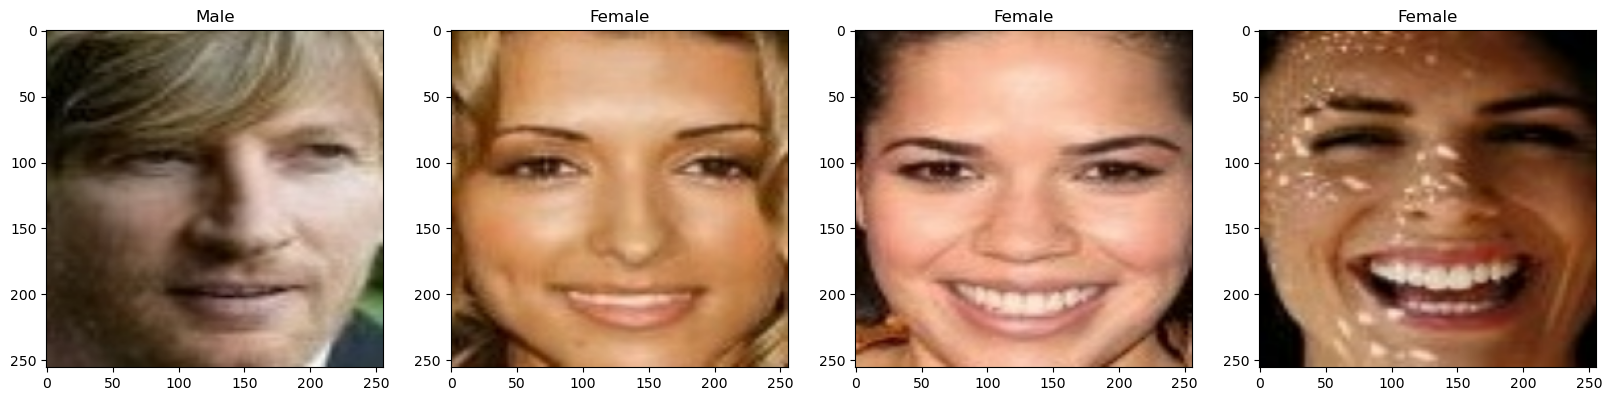

In [48]:
visualize_batch_image(batch)

### Data Normalizattion

In [62]:
data = data.map(lambda x,y: (x/255, y))

In [63]:
batch=data.as_numpy_iterator().next()

In [64]:
batch

(array([[[[3.92156886e-03, 0.00000000e+00, 0.00000000e+00],
          [3.92156886e-03, 0.00000000e+00, 0.00000000e+00],
          [5.21599269e-03, 1.29442406e-03, 0.00000000e+00],
          ...,
          [1.16881123e-02, 5.17769624e-03, 0.00000000e+00],
          [3.92156886e-03, 0.00000000e+00, 0.00000000e+00],
          [3.92156886e-03, 0.00000000e+00, 0.00000000e+00]],
 
         [[4.46537975e-03, 5.43811300e-04, 0.00000000e+00],
          [4.46537975e-03, 5.43811300e-04, 0.00000000e+00],
          [5.93930390e-03, 1.65873510e-03, 0.00000000e+00],
          ...,
          [1.24167353e-02, 5.17769624e-03, 0.00000000e+00],
          [5.00919111e-03, 0.00000000e+00, 0.00000000e+00],
          [5.00919111e-03, 0.00000000e+00, 0.00000000e+00]],
 
         [[6.13511028e-03, 2.21354165e-03, 0.00000000e+00],
          [6.13511028e-03, 2.21354165e-03, 0.00000000e+00],
          [8.16017576e-03, 2.77732406e-03, 0.00000000e+00],
          ...,
          [1.46539127e-02, 5.17769624e-03, 0.0000

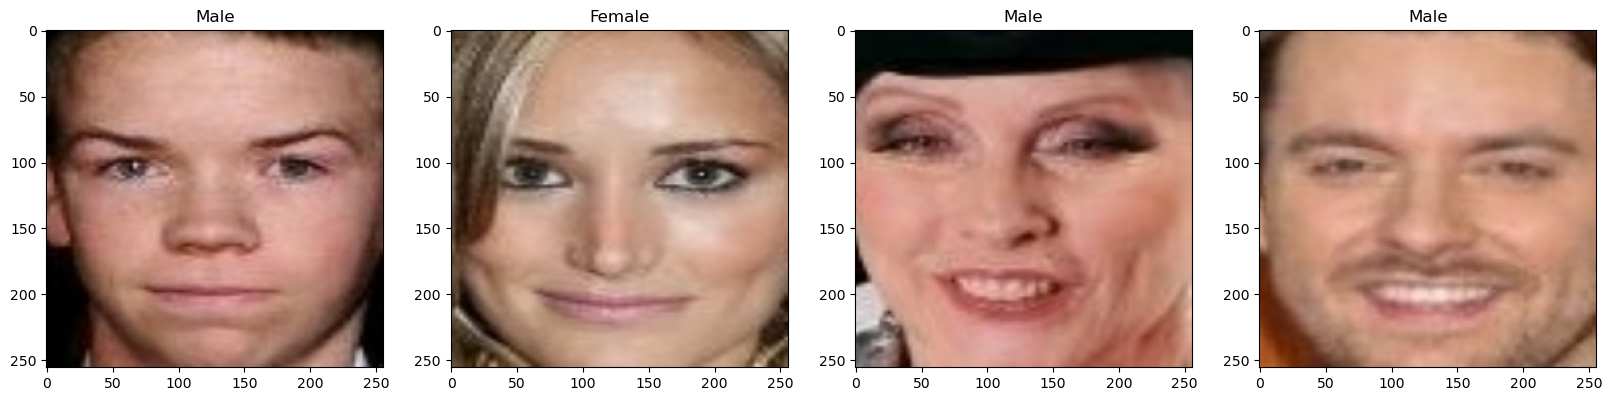

In [65]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(classes[batch[1][idx]])

## Split Data

In [66]:
train_size, val_size, test_size = int(len(data)*.8), int(len(data)*.1), int(len(data)*.1)

In [67]:
train_size

292

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Build Deep Learning Model

In [71]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [74]:
model = Sequential()

In [75]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

In [78]:
logdir='logs'

In [79]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

#### Train the model with epochs=10

In [80]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
292/292 [==============================] - 313s 1s/step - loss: 0.3904 - accuracy: 0.8197 - val_loss: 0.2246 - val_accuracy: 0.9132
Epoch 2/10
292/292 [==============================] - 299s 1s/step - loss: 0.2199 - accuracy: 0.9157 - val_loss: 0.1875 - val_accuracy: 0.9253
Epoch 3/10
292/292 [==============================] - 266s 909ms/step - loss: 0.1804 - accuracy: 0.9316 - val_loss: 0.1866 - val_accuracy: 0.9297
Epoch 4/10
292/292 [==============================] - 290s 993ms/step - loss: 0.1393 - accuracy: 0.9436 - val_loss: 0.1718 - val_accuracy: 0.9392
Epoch 5/10
292/292 [==============================] - 265s 906ms/step - loss: 0.1099 - accuracy: 0.9592 - val_loss: 0.1536 - val_accuracy: 0.9418
Epoch 6/10
292/292 [==============================] - 261s 893ms/step - loss: 0.0808 - accuracy: 0.9694 - val_loss: 0.1758 - val_accuracy: 0.9462
Epoch 7/10
292/292 [==============================] - 266s 908ms/step - loss: 0.0562 - accuracy: 0.9805 - val_loss: 0.1988 - val_a

In [86]:
def plot_history(array1, array2, subtitle='', color1='teal', color2='orange', loc='upper right'):
    fig = plt.figure(figsize=(8,  4))
    plt.plot(array1, color=color1, label='loss')
    plt.plot(array2, color=color2, label='val_loss')
    fig.suptitle(subtitle, fontsize=20)
    plt.legend(loc="upper right")
    plt.show()

####  Loss Visualization

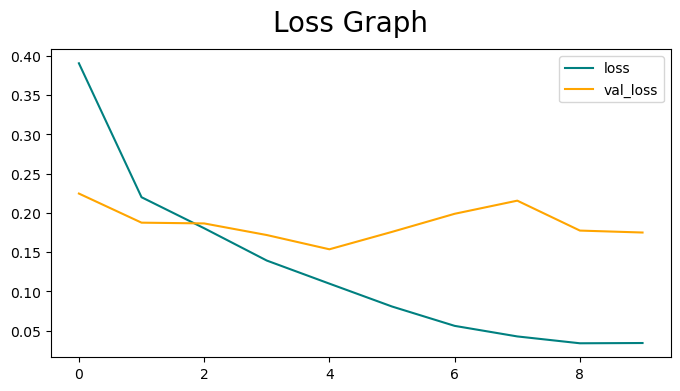

In [87]:
plot_history(hist.history['loss'], hist.history['val_loss'], subtitle='Loss Graph')

#### Accuracy Visualization

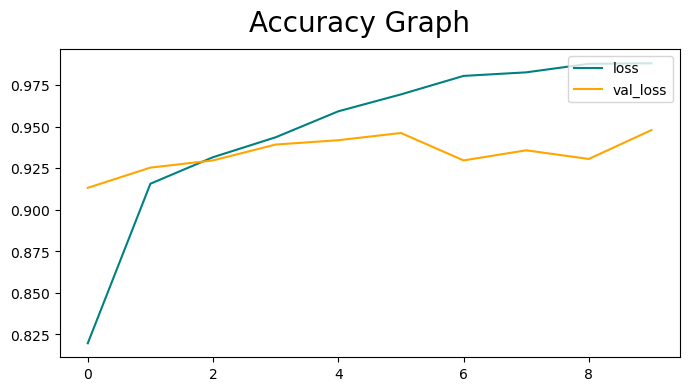

In [88]:
plot_history(hist.history['accuracy'], hist.history['val_accuracy'], subtitle='Accuracy Graph', loc="upper left")

## Evaluate Model

In [89]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [91]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [128]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 261ms/step


In [129]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(0.92409533, shape=(), dtype=float32) tf.Tensor(0.955542, shape=(), dtype=float32) tf.Tensor(0.9401042, shape=(), dtype=float32)


## Test Model

In [115]:
def load_img(path):
    """
    This load image and return its normalized data
    """
    image = tf.image.resize(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB), (256, 256))
    return np.expand_dims(image/255, 0)


def get_class(result):
    """
    : Return data with class and accuracy
    """
    val = result[0][0]
    data = {
        "class":  "",
        "accuracy": ""
    }

    if val > 0.5:
        val = val*100
        data["class"], data["accuracy"] = classes[1], val
        
        return data
    
    else:
        val = (1-val)*100
        data["class"], data["accuracy"] = classes[0], val
        return data
    
def predicts(model_path, img):
    try:        
        model = load_model(model_path)
    except OSError as err:
        model = model_path
    finally:
        result = model.predict(img)
        return get_class(result=result)

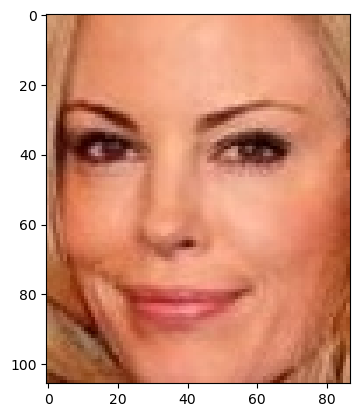

In [111]:
img = cv2.imread('datasets/female/112950.jpg.jpg') #C:/Users/JB/Pictures/Camera Roll/WIN_20230502_03_19_12_Pro.jpg
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), )
plt.show()

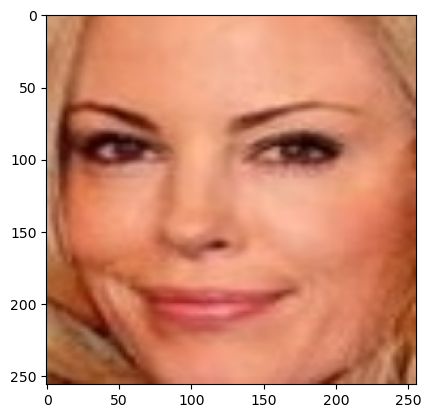

In [118]:
resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [106]:
image = load_img(path='datasets/female/112950.jpg.jpg')

In [113]:
from tensorflow.keras.models import load_model

In [116]:
predicts(model_path=model, img=image)

1/1 [==============================] - 0s 51ms/step


{'class': 'Female', 'accuracy': 99.99738809674454}

## Save Model

In [119]:
from tensorflow.keras.models import load_model

In [120]:
import os

In [121]:
model.save(os.path.join('models','genderclassifier.h5'))

In [126]:
res = predicts(model_path=os.path.join('models', 'genderclassifier.h5'), img=image)

1/1 [==============================] - 0s 96ms/step


In [127]:
res

{'class': 'Female', 'accuracy': 99.99738809674454}

### Summary
---
Gender classification is an aspect of computer vision and it has application in engineering and computer science.
The model is built using tensorflow pipeline with n_epoch=10.

**Author**: Johnbull Vitowanu (Software Engr)

**Input Data**

*Image Number*: 11649 files (Kaggle gender validation dataset)

*Number of classes*: 2 classes (female, male).

**Architecture**
```
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 256)               3686656   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
=================================================================
Total params: 3,696,625
Trainable params: 3,696,625
Non-trainable params: 0
_________________________________________________________________
```

**Accuracy Result on Test data**
```
tf.Tensor(0.92409533, shape=(), dtype=float32) tf.Tensor(0.955542, shape=(), dtype=float32) tf.Tensor(0.9401042, shape=(), dtype=float32)
```
